#### 1.Tic-Tac-Toe Game


In [2]:
# modified according to teacher

#Q1.Write a program to design a TIC TAC TOE game, a game in which two players alternately put 0s and 1s in 3 X 3
#matrix and each player tries to get a row/column/diagonal of three 1s or three 0s before the opponent does.
import random

def print_board(board):
    for row in board:
        print(" | ".join(map(str, row)))
        print("-" * 9)

def check_winner(board):
    for i in range(3):
        if board[i][0] == board[i][1] == board[i][2] and board[i][0] != " ":
            return True
        if board[0][i] == board[1][i] == board[2][i] and board[0][i] != " ":
            return True
    
    
    if board[0][0] == board[1][1] == board[2][2] and board[0][0] != " ":
        return True
    if board[0][2] == board[1][1] == board[2][0] and board[0][2] != " ":
        return True
    
    return False

def is_full(board):
    for row in board:
        if " " in row:
            return False
    return True

def get_computer_move(board):
    empty_cells = [(r, c) for r in range(3) for c in range(3) if board[r][c] == " "]
    return random.choice(empty_cells) if empty_cells else None

def tic_tac_toe():
    board = [[" " for _ in range(3)] for _ in range(3)]
    player_symbol, computer_symbol = "0", "1"
    
    print("Welcome to TIC TAC TOE!")
    first_player = input("Do you want to play first? (yes/no): ").strip().lower()
    player_turn = first_player == "yes"
    
    print_board(board)
    
    while True:
        if player_turn:
            print("Your turn.")
            row, col = -1, -1
            while True:
                try:
                    row, col = map(int, input("Enter row and column (0-2) separated by space: ").split())
                    if board[row][col] == " ":
                        break
                    else:
                        print("Cell already occupied. Try again.")
                except (ValueError, IndexError):
                    print("Invalid input. Enter numbers between 0 and 2.")
        else:
            print("Computer's turn...")
            row, col = get_computer_move(board)
        
        board[row][col] = player_symbol if player_turn else computer_symbol
        print_board(board)
        
        if check_winner(board):
            print("You win!" if player_turn else "Computer wins!")
            break
        elif is_full(board):
            print("It's a draw!")
            break
        
        player_turn = not player_turn

if __name__ == "__main__":
    tic_tac_toe()


Welcome to TIC TAC TOE!


Do you want to play first? (yes/no):  n


  |   |  
---------
  |   |  
---------
  |   |  
---------
Computer's turn...
  | 1 |  
---------
  |   |  
---------
  |   |  
---------
Your turn.


Enter row and column (0-2) separated by space:  00


Invalid input. Enter numbers between 0 and 2.


Enter row and column (0-2) separated by space:  


Invalid input. Enter numbers between 0 and 2.


Enter row and column (0-2) separated by space:   0 0


0 | 1 |  
---------
  |   |  
---------
  |   |  
---------
Computer's turn...
0 | 1 |  
---------
  |   |  
---------
  |   | 1
---------
Your turn.


Enter row and column (0-2) separated by space:  1 0


0 | 1 |  
---------
0 |   |  
---------
  |   | 1
---------
Computer's turn...
0 | 1 |  
---------
0 |   |  
---------
  | 1 | 1
---------
Your turn.


Enter row and column (0-2) separated by space:  2 0


0 | 1 |  
---------
0 |   |  
---------
0 | 1 | 1
---------
You win!


#### 2. 8 puzzle problem

In [5]:
import heapq

# Goal state for the 8-puzzle
goal_state = [[1, 2, 3], [4, 5, 6], [7, 8, 0]]

# Get the position of each tile in the goal state
goal_positions = {goal_state[i][j]: (i, j) for i in range(3) for j in range(3)}

# Directions for moving the empty space
directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # up, down, left, right

# Function to calculate the Manhattan distance heuristic
def manhattan_distance(state):
    distance = 0
    for i in range(3):
        for j in range(3):
            tile = state[i][j]
            if tile != 0:
                goal_x, goal_y = goal_positions[tile]
                distance += abs(i - goal_x) + abs(j - goal_y)
    return distance

# Function to get the possible moves for the empty space
def get_neighbors(state):
    empty_x, empty_y = next((i, j) for i in range(3) for j in range(3) if state[i][j] == 0)
    neighbors = []
    
    for dx, dy in directions:
        new_x, new_y = empty_x + dx, empty_y + dy
        if 0 <= new_x < 3 and 0 <= new_y < 3:
            new_state = [row[:] for row in state]
            new_state[empty_x][empty_y], new_state[new_x][new_y] = new_state[new_x][new_y], new_state[empty_x][empty_y]
            neighbors.append((new_state, (new_x, new_y)))
    return neighbors

# Function to reconstruct the path from the goal to the start
def reconstruct_path(came_from, current):
    path = []
    while current is not None:
        path.append(current)
        current = came_from.get(current)
    return path[::-1]

# A* search algorithm for solving the 8-puzzle
def a_star(start_state):
    open_set = []
    
    # Convert the start state to a tuple of tuples (hashable)
    start_state_tuple = tuple(tuple(row) for row in start_state)
    
    heapq.heappush(open_set, (0 + manhattan_distance(start_state), 0, start_state_tuple, None))  # (f, g, state, parent)
    came_from = {}
    g_score = {start_state_tuple: 0}
    
    while open_set:
        _, g, current_state, parent = heapq.heappop(open_set)
        
        if current_state == tuple(tuple(row) for row in goal_state):
            return reconstruct_path(came_from, current_state)
        
        for neighbor_state, _ in get_neighbors([list(row) for row in current_state]):  # Convert back to list for manipulation
            neighbor_tuple = tuple(tuple(row) for row in neighbor_state)  # Convert back to tuple
            
            tentative_g_score = g + 1
            
            if neighbor_tuple not in g_score or tentative_g_score < g_score[neighbor_tuple]:
                g_score[neighbor_tuple] = tentative_g_score
                f_score = tentative_g_score + manhattan_distance(neighbor_state)
                heapq.heappush(open_set, (f_score, tentative_g_score, neighbor_tuple, current_state))
                came_from[neighbor_tuple] = current_state
    
    return None  # No solution found

# Function to print the state of the board
def print_board(state):
    for row in state:
        print(" ".join(str(x) if x != 0 else " " for x in row))
    print()

if __name__ == "__main__":
    # Define the start state of the puzzle
    start_state = [
        [1, 2, 3],
        [4, 5, 6],
        [7, 0, 8]
    ]
    
    print("Start state:")
    print_board(start_state)
    
    # Solve the puzzle using A*
    path = a_star(start_state)
    
    if path:
        print("\nSolution path:")
        for state in path:
            print_board(state)
    else:
        print("\nNo solution found.")


Start state:
1 2 3
4 5 6
7   8


Solution path:
1 2 3
4 5 6
7   8

1 2 3
4 5 6
7 8  



#### 3. 6 x 6 Sudoku game

In [8]:
def print_board(board):
    """Function to print the board"""
    for i in range(6):
        if i % 2 == 0 and i != 0:
            print("-" * 17) 
        for j in range(6):
            if j % 2 == 0 and j != 0:
                print(" | ", end="")
            print(board[i][j], end=" " if j != 5 else "\n")

def is_valid(board, row, col, num):
    """Check if it's valid to place the number 'num' at position (row, col)"""
  
    for j in range(6):
        if board[row][j] == num:
            return False

    
    for i in range(6):
        if board[i][col] == num:
            return False

    
    start_row, start_col = 2 * (row // 2), 3 * (col // 3)
    for i in range(start_row, start_row + 2):
        for j in range(start_col, start_col + 3):
            if board[i][j] == num:
                return False

    return True

def solve_sudoku(board):
    """Solves the Sudoku puzzle using backtracking"""
    for row in range(6):
        for col in range(6):
            if board[row][col] == 0:  
                for num in range(1, 7): 
                    if is_valid(board, row, col, num):
                        board[row][col] = num 
                        
                        if solve_sudoku(board):  
                            return True
                        
                        board[row][col] = 0  
                return False  
    return True  

def main():

    board = [
        [5, 3, 0, 0, 7, 0],
        [6, 0, 0, 1, 9, 5],
        [0, 9, 8, 0, 0, 0],
        [8, 0, 0, 0, 6, 0],
        [4, 0, 0, 8, 0, 3],
        [7, 0, 0, 0, 2, 0]
    ]
    
    print("Original Sudoku Puzzle:")
    print_board(board)
    
    if solve_sudoku(board):
        print("\nSolved Sudoku Puzzle:")
        print_board(board)
    else:
        print("\nNo solution exists.")

if __name__ == "__main__":
    main()


Original Sudoku Puzzle:
5 3  | 0 0  | 7 0
6 0  | 0 1  | 9 5
-----------------
0 9  | 8 0  | 0 0
8 0  | 0 0  | 6 0
-----------------
4 0  | 0 8  | 0 3
7 0  | 0 0  | 2 0

Solved Sudoku Puzzle:
5 3  | 1 2  | 7 4
6 2  | 4 1  | 9 5
-----------------
1 9  | 8 3  | 4 2
8 4  | 2 5  | 6 1
-----------------
4 1  | 6 8  | 5 3
7 5  | 3 4  | 2 6


#### 4. the decision tree based ID3 algorithm.

In [21]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from math import log2


iris = load_iris()
X = iris.data
y = iris.target  
feature_names = iris.feature_names


data = pd.DataFrame(X, columns=feature_names)
data['target'] = y


def entropy(data):
    total = len(data)
    
    label_counts = data['target'].value_counts()
    entropy_val = 0
    for count in label_counts:
      
        prob = count / total
        entropy_val -= prob * log2(prob)
    return entropy_val


def information_gain(data, feature):
    
    original_entropy = entropy(data)
    
 
    feature_values = data[feature].unique()
    weighted_entropy = 0
    for value in feature_values:
        subset = data[data[feature] == value]
        weighted_entropy += (len(subset) / len(data)) * entropy(subset)
    
 
    return original_entropy - weighted_entropy


def best_feature(data):
    best_info_gain = -float('inf')
    best_feature = None
    for feature in data.columns[:-1]:  
        info_gain = information_gain(data, feature)
        if info_gain > best_info_gain:
            best_info_gain = info_gain
            best_feature = feature
    return best_feature


def id3(data, features):
   
    if len(data['target'].unique()) == 1:
        return data['target'].iloc[0]
    
 
    if len(features) == 0:
        return data['target'].mode()[0]
    

    best_feat = best_feature(data)
    tree = {best_feat: {}}
    

    for value in data[best_feat].unique():
        subset = data[data[best_feat] == value]
        subtree = id3(subset, [f for f in features if f != best_feat])
        tree[best_feat][value] = subtree
    
    return tree


def classify(tree, sample):
    if isinstance(tree, dict):

        feature = list(tree.keys())[0]
    
        feature_value = sample[feature]
  
        return classify(tree[feature][feature_value], sample)
    else:
       
        return tree


tree = id3(data, feature_names)


print("Decision Tree:")
print(tree)


new_sample = {
    'sepal length (cm)': 5.1,
    'sepal width (cm)': 3.5,
    'petal length (cm)': 1.4,
    'petal width (cm)': 0.2
}


new_sample_df = pd.DataFrame([new_sample])


predicted_class = classify(tree, new_sample)
print(f"\nPredicted class for the new sample: {predicted_class}")


Decision Tree:
{'petal length (cm)': {np.float64(1.4): np.int64(0), np.float64(1.3): np.int64(0), np.float64(1.5): np.int64(0), np.float64(1.7): np.int64(0), np.float64(1.6): np.int64(0), np.float64(1.1): np.int64(0), np.float64(1.2): np.int64(0), np.float64(1.0): np.int64(0), np.float64(1.9): np.int64(0), np.float64(4.7): np.int64(1), np.float64(4.5): {'sepal length (cm)': {np.float64(6.4): np.int64(1), np.float64(5.7): np.int64(1), np.float64(5.6): np.int64(1), np.float64(6.2): np.int64(1), np.float64(6.0): np.int64(1), np.float64(5.4): np.int64(1), np.float64(4.9): np.int64(2)}}, np.float64(4.9): {'sepal width (cm)': {np.float64(3.1): np.int64(1), np.float64(2.5): np.int64(1), np.float64(2.8): np.int64(2), np.float64(2.7): np.int64(2), np.float64(3.0): np.int64(2)}}, np.float64(4.0): np.int64(1), np.float64(4.6): np.int64(1), np.float64(3.3): np.int64(1), np.float64(3.9): np.int64(1), np.float64(3.5): np.int64(1), np.float64(4.2): np.int64(1), np.float64(3.6): np.int64(1), np.float6

#### 5. simple linear regression using lib

Model slope (coefficient): -1.1000000000000005
Model intercept: 10.3


Enter a number 'x' to predict the 'y' : 3


Predicted value for x=3 is: y=[7.]


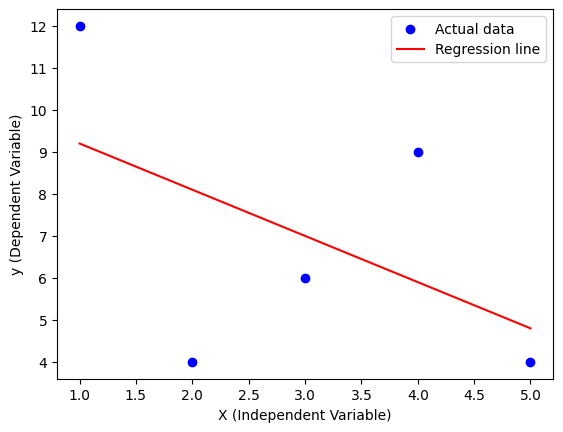

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1) 
y = np.array([12, 4, 6, 9, 4]) 

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print("Model slope (coefficient):", model.coef_[0])
print("Model intercept:", model.intercept_)

new = (int(input("Enter a number 'x' to predict the 'y' :")))
print(f"Predicted value for x={new} is: y={model.predict(np.array(new).reshape(-1,1))}")

plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('X (Independent Variable)')
plt.ylabel('y (Dependent Variable)')
plt.legend()
plt.show()

#### 5. simple linear regression without using lib

In [3]:
X = [1, 2, 3, 4, 5] 
Y = [12, 4, 6, 9, 4]

def mean(values): 
    return sum(values) / len(values)

def slope(x, y, x_mean, y_mean): 
    m = 0.0 
    for i in range(len(x)): 
        m += (x[i] - x_mean) * (y[i] - y_mean) 
    return m

def variance(values, mean_value): 
    var = 0.0 
    for v in values: 
        var += (v - mean_value) ** 2 
    return var

def linear_regression(x, y): 
    x_mean, y_mean = mean(x), mean(y) 
    m = slope(x, y, x_mean, y_mean) / variance(x, x_mean) 
    b = y_mean - m * x_mean 
    return m, b
    
m, c = linear_regression(X, Y)
new = int(input("Enter a number 'x' to predict the 'y' :"))
print(f"Predicted value for x={new} is: y={m*new+c}")

Enter a number 'x' to predict the 'y' : 3


Predicted value for x=3 is: y=7.0


#### 6.  multiple linear regression.

Model slope (coefficient for inflation_rate): 0.7131782945736433
Model slope (coefficient for global_rate): 1.078036175710594
Model intercept: -2.5607235142118725


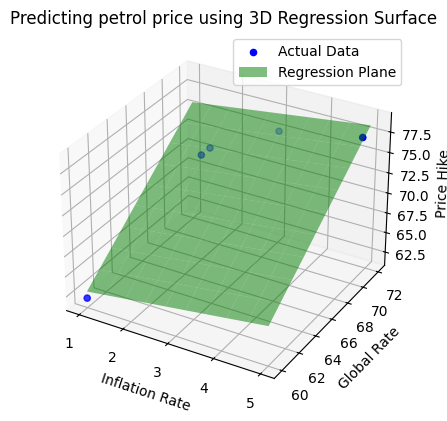

Enter the inflation rate 6
Enter the global rate of the crude oil 100


The value of petrol with the inflation rate of 6, and the global price of 100 is : [109.52196382]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

inflation_rate = np.array([1, 2, 3, 2, 5])
global_rate = np.array([60, 68, 72, 69, 71])
price_hike = np.array([62, 74, 75, 74, 78])

model = LinearRegression()


X = np.array(list(zip(inflation_rate, global_rate))) 
model.fit(X, price_hike)
y_pred = model.predict(X)

print("Model slope (coefficient for inflation_rate):", model.coef_[0])
print("Model slope (coefficient for global_rate):", model.coef_[1])
print("Model intercept:", model.intercept_)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(inflation_rate, global_rate, price_hike, color='blue', label='Actual Data')
inflation_rate_grid, global_rate_grid = np.meshgrid(np.linspace(min(inflation_rate), max(inflation_rate), 10),
                                                   np.linspace(min(global_rate), max(global_rate), 10))

predicted_price_hike = model.intercept_ + model.coef_[0] * inflation_rate_grid + model.coef_[1] * global_rate_grid

ax.plot_surface(inflation_rate_grid, global_rate_grid, predicted_price_hike, color='green', alpha=0.5, label='Regression Plane')
ax.set_xlabel('Inflation Rate')
ax.set_ylabel('Global Rate')
ax.set_zlabel('Price Hike')
ax.set_title('Predicting petrol price using 3D Regression Surface')
ax.legend()
plt.show()

a=int(input('Enter the inflation rate'))
b=int(input('Enter the global rate of the crude oil'))

data=np.array([[a, b]])
print(f'The value of petrol with the inflation rate of {a}, and the global price of {b} is : {model.predict(data)}');

#### 7. naïve Bayesian classifier

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score


iris = load_iris()
X = iris.data  
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = GaussianNB()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the Naive Bayes classifier: {accuracy * 100:.2f}%")


Accuracy of the Naive Bayes classifier: 100.00%


#### 8. k-Nearest Neighbour algorithm

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score


iris = load_iris()
X = iris.data 
y = iris.target  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


k = 3  
model = KNeighborsClassifier(n_neighbors=k)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of k-NN classifier (k={k}): {accuracy * 100:.2f}%")


Accuracy of k-NN classifier (k=3): 100.00%


#### 9. compare Support Vector Machine (SVM) and Artificial Neural Network(ANN)

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score


iris = load_iris()
X = iris.data  
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svm_model = SVC(kernel='linear', random_state=42)


svm_model.fit(X_train, y_train)


svm_pred = svm_model.predict(X_test)


svm_accuracy = accuracy_score(y_test, svm_pred)


ann_model = MLPClassifier(hidden_layer_sizes=(10, ), max_iter=1000, random_state=42)


ann_model.fit(X_train, y_train)


ann_pred = ann_model.predict(X_test)


ann_accuracy = accuracy_score(y_test, ann_pred)


print(f"Accuracy of Support Vector Machine (SVM): {svm_accuracy * 100:.2f}%")
print(f"Accuracy of Artificial Neural Network (ANN): {ann_accuracy * 100:.2f}%")


Accuracy of Support Vector Machine (SVM): 100.00%
Accuracy of Artificial Neural Network (ANN): 96.67%


/opt/tljh/user/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


#### 10. k-means clustering algorithm

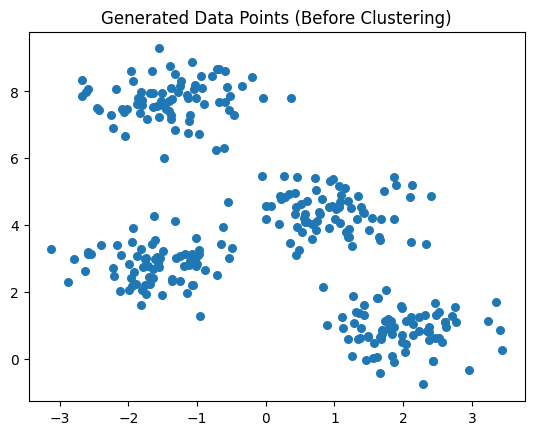

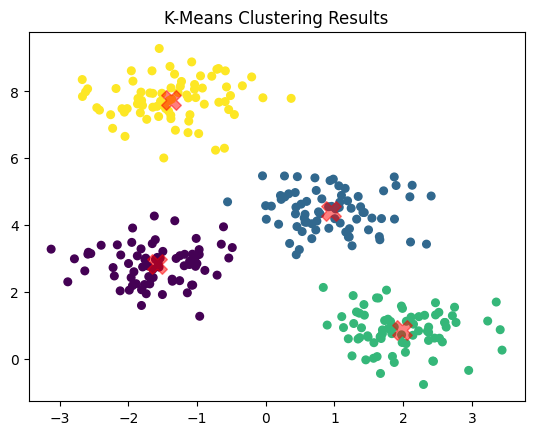

Cluster Centers (Centroids):
[[-1.58438467  2.83081263]
 [ 0.94973532  4.41906906]
 [ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]]

Labels (Cluster assignments for each point):
[2 3 1 3 2 2 0 1 3 3 0 3 1 3 2 1 1 2 0 0 2 2 1 0 0 1 2 1 0 1 3 3 1 3 3 3 3
 3 0 2 1 0 1 1 0 0 3 0 3 2 0 2 3 2 2 0 3 0 3 2 3 1 3 0 0 0 3 2 3 0 1 0 3 0
 0 3 0 1 2 3 2 1 2 2 3 1 2 1 3 3 1 2 3 0 0 1 2 2 1 0 3 2 3 2 1 2 2 1 3 1 0
 0 2 3 2 1 3 2 2 1 0 2 0 2 2 2 2 0 2 0 3 0 0 2 3 0 0 3 1 3 3 0 1 0 1 0 3 1
 3 3 3 1 3 1 2 0 3 0 2 1 3 1 1 2 1 0 0 1 2 1 1 3 2 1 0 3 2 2 1 0 2 1 0 0 1
 1 1 1 2 3 1 0 1 1 0 0 0 1 0 3 1 0 2 0 1 3 0 3 1 3 1 0 1 1 3 0 0 2 2 1 3 2
 2 0 2 0 1 3 3 1 1 3 1 2 0 1 2 0 3 0 2 1 2 3 3 3 3 0 0 3 1 0 2 1 0 0 0 2 2
 3 1 1 0 2 3 0 1 3 1 2 2 0 0 1 2 2 2 1 3 3 2 2 1 2 2 2 3 0 3 1 2 2 3 3 3 2
 2 1 3 0]

Inertia (Sum of squared distances to centroids): 212.00599621083478


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)


plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("Generated Data Points (Before Clustering)")
plt.show()


kmeans = KMeans(n_clusters=4)  
kmeans.fit(X)  


centroids = kmeans.cluster_centers_
labels = kmeans.labels_


plt.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='viridis')


plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5, marker='X')
plt.title("K-Means Clustering Results")
plt.show()


print("Cluster Centers (Centroids):")
print(centroids)

print("\nLabels (Cluster assignments for each point):")
print(labels)


inertia = kmeans.inertia_
print(f"\nInertia (Sum of squared distances to centroids): {inertia}")
